In [1]:
import pandas as pd

In [2]:
### 시각화를 위한 라이브러리
# - 파이썬 시각화에서 가장 기본적인 시각화 라이브러리
import matplotlib.pyplot as plt

### 한글처리
from matplotlib import font_manager, rc

### 운영체제 확인 라이브러리
import platform

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

### OS별 한글처리
# - 윈도우 운영체게
if platform.system() == "Windows" :
    # path = "c:/Windows/Fonts/malgun.ttf"
    # font_name = font_manager.FontProperties(fname=path).get_name()
    # rc("font", family = font_name)
    
    ### 또는 아래처럼 한줄로도 가능 (아래 한글처리를 주로 사용합니다.)
    plt.rc("font", family = "Malgun Gothic")

# - Mac 운영체제
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")
    
else :
    print("넌 누구?")

In [3]:
cn7 = pd.read_csv("./cn7_resampled.csv")
cn7 = cn7.drop(columns=["Clamp_Open_Position"])

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 준비 (cn7 데이터프레임 사용)
X = cn7.drop('PassOrFail', axis=1)
y = cn7['PassOrFail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 성능 확인
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')




Accuracy: 0.99


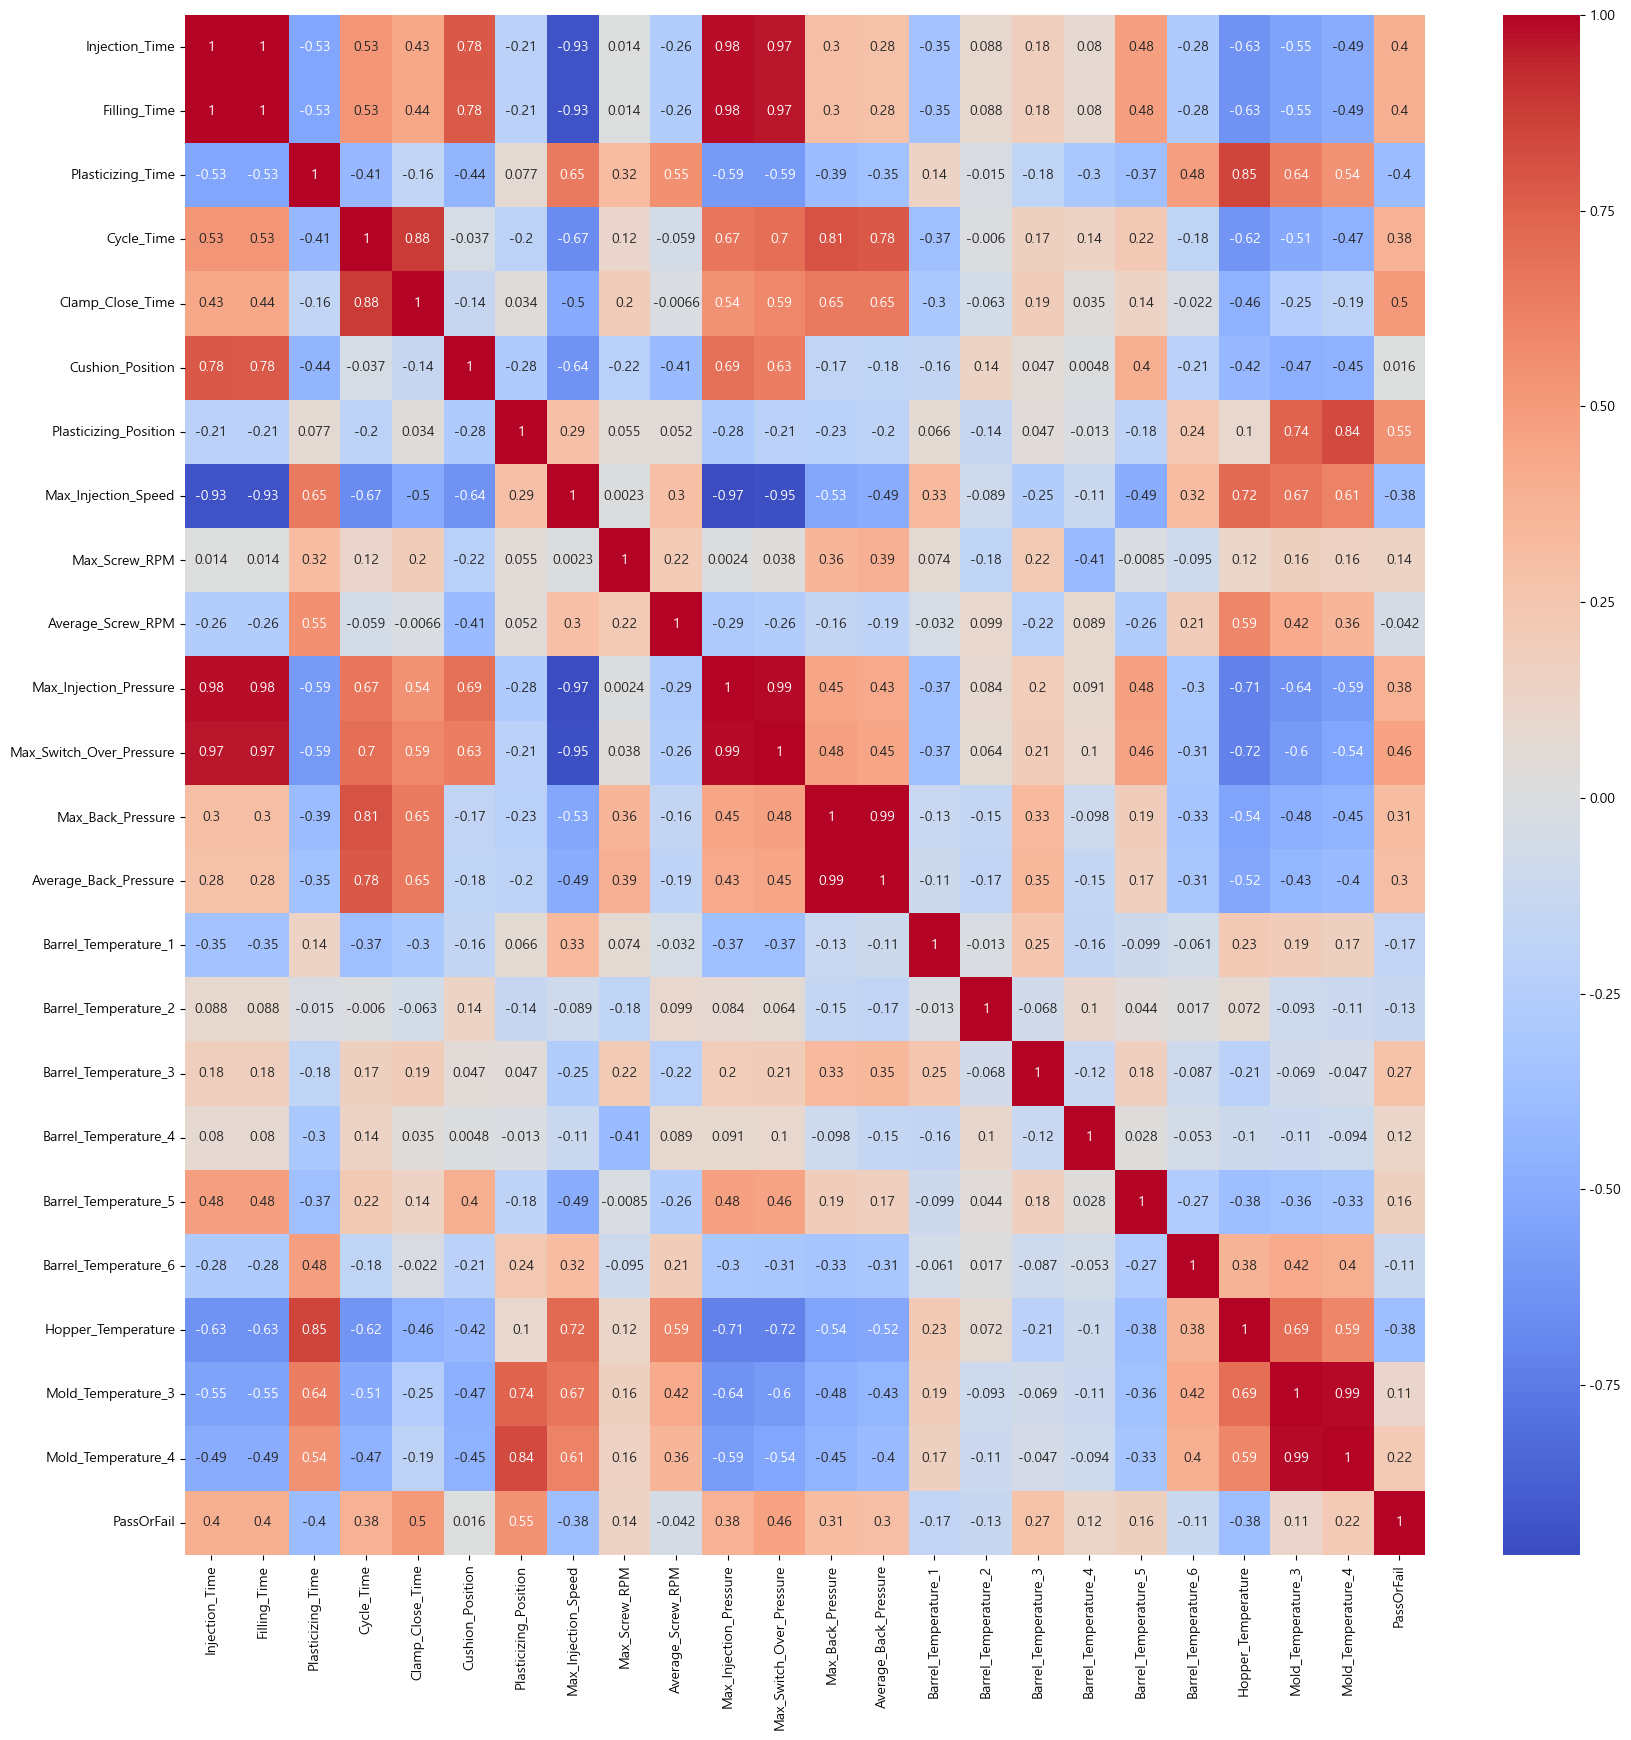

In [6]:
cn7.columns

Index(['Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Plasticizing_Position',
       'Max_Injection_Speed', 'Max_Screw_RPM', 'Average_Screw_RPM',
       'Max_Injection_Pressure', 'Max_Switch_Over_Pressure',
       'Max_Back_Pressure', 'Average_Back_Pressure', 'Barrel_Temperature_1',
       'Barrel_Temperature_2', 'Barrel_Temperature_3', 'Barrel_Temperature_4',
       'Barrel_Temperature_5', 'Barrel_Temperature_6', 'Hopper_Temperature',
       'Mold_Temperature_3', 'Mold_Temperature_4', 'PassOrFail'],
      dtype='object')

In [7]:
from scipy.stats import spearmanr, pearsonr
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])
for col_name in X.columns:
    print(col_name)
    print("피어슨")
    print(pearsonr(X[col_name], y))
    print("스피어만")
    print(spearmanr(X[col_name], y))
    print("==================================================================")

Injection_Time
피어슨
PearsonRResult(statistic=0.3973768786237092, pvalue=3.657470066414128e-126)
스피어만
SignificanceResult(statistic=0.23063949894561378, pvalue=2.2134072967540589e-41)
Filling_Time
피어슨
PearsonRResult(statistic=0.3974964042491591, pvalue=3.0315124502757e-126)
스피어만
SignificanceResult(statistic=0.22828458171641663, pvalue=1.4872947872659528e-40)
Plasticizing_Time
피어슨
PearsonRResult(statistic=-0.39523293123853376, pvalue=1.0465068500475921e-124)
스피어만
SignificanceResult(statistic=-0.29345739917002256, pvalue=5.1449101599946426e-67)
Cycle_Time
피어슨
PearsonRResult(statistic=0.38008336203235726, pvalue=1.0206904959324136e-114)
스피어만
SignificanceResult(statistic=0.08193791055724713, pvalue=2.2425637786800358e-06)
Clamp_Close_Time
피어슨
PearsonRResult(statistic=0.5019963897372182, pvalue=9.779398114809177e-212)
스피어만
SignificanceResult(statistic=0.656109848354027, pvalue=0.0)
Cushion_Position
피어슨
PearsonRResult(statistic=0.01593505398059416, pvalue=0.35839137600267884)
스피어만
SignificanceR

In [8]:
cn7 = cn7.drop(columns=["Max_Screw_RPM", "Average_Screw_RPM", "Barrel_Temperature_1", "Barrel_Temperature_2",
"Barrel_Temperature_4", "Barrel_Temperature_5", "Barrel_Temperature_6"])

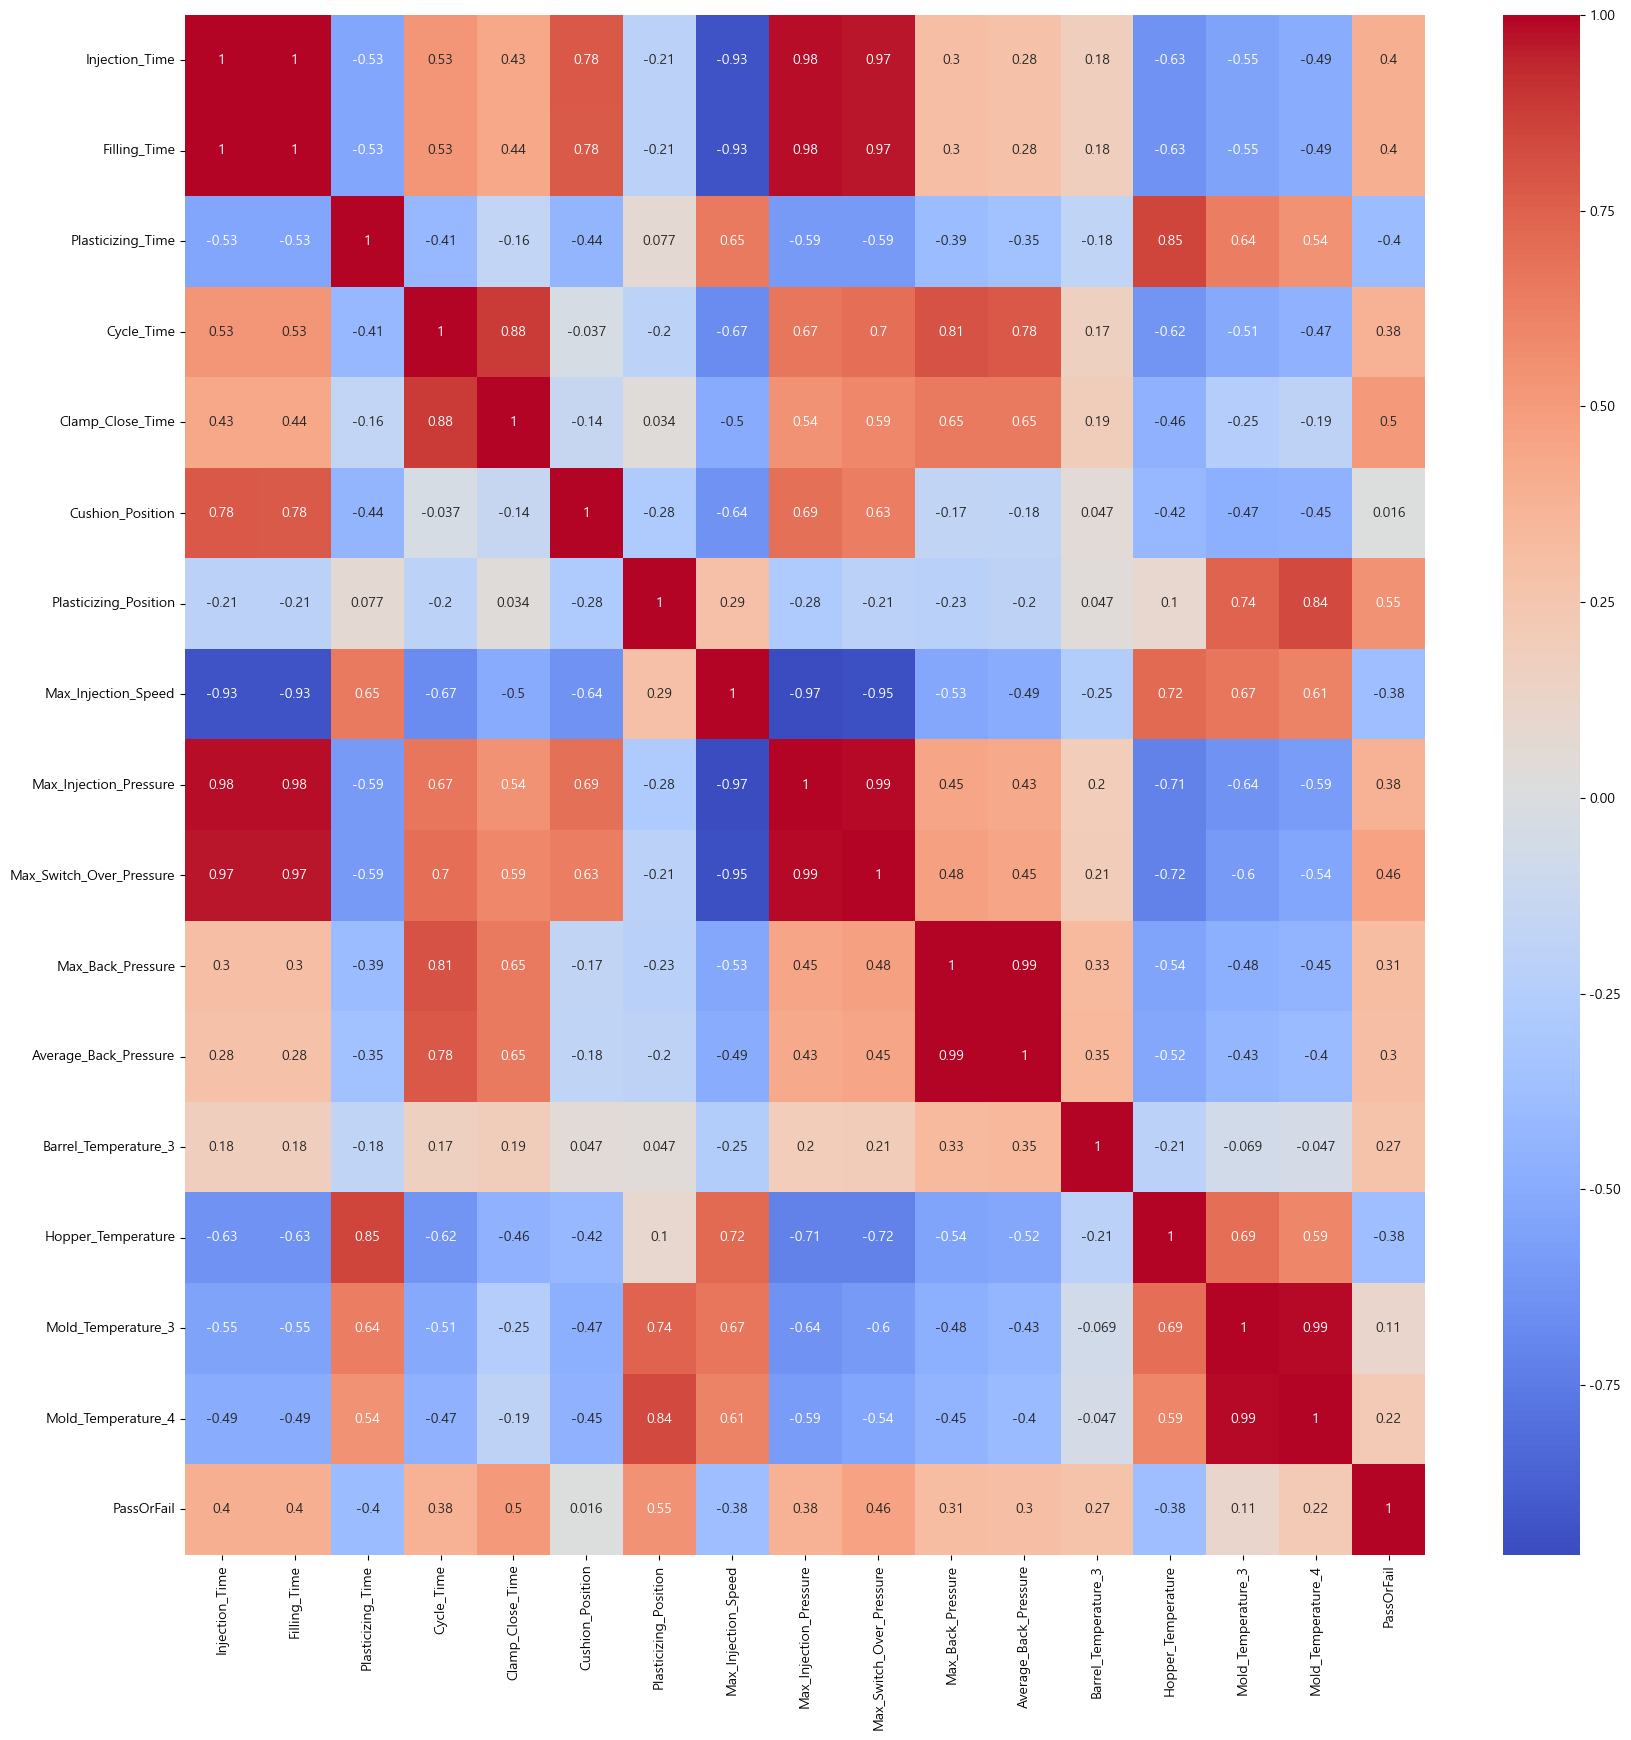

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(cn7.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
cn7.columns
['Injection_Time', 'Filling_Time', 'Max_Injection_Speed', 'Max_Injection_Pressure', 'Max_Switch_Over_Pressure']

['Injection_Time',
 'Filling_Time',
 'Max_Injection_Speed',
 'Max_Injection_Pressure',
 'Max_Switch_Over_Pressure']

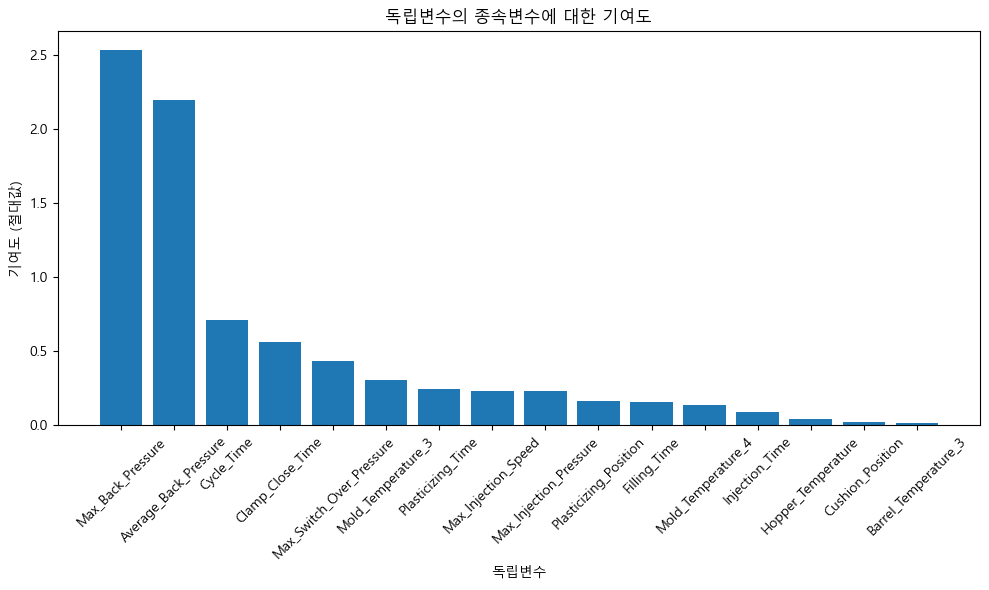

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# 1. 데이터 로드 및 전처리
data = cn7
y = data["PassOrFail"]
X = data.drop(columns=["PassOrFail"])

# 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. 회귀 모델 학습
model = LinearRegression()
model.fit(X_scaled, y)

# 3. 독립변수 기여도 계산 (회귀 계수의 절대값 기준)
coefficients = model.coef_
feature_names = X.columns  # 컬럼명 가져오기

# 기여도 계산 및 정렬
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)[::-1]

# 4. 기여도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), importance[sorted_idx], tick_label=np.array(feature_names)[sorted_idx])
plt.title('독립변수의 종속변수에 대한 기여도')
plt.xlabel('독립변수')
plt.ylabel('기여도 (절대값)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_pca = cn7[['Injection_Time', 'Filling_Time', 'Max_Injection_Speed', 'Max_Injection_Pressure', 'Max_Switch_Over_Pressure']].copy()


data_other = cn7.drop(columns=['Injection_Time', 'Filling_Time', 'Max_Injection_Speed', 'Max_Injection_Pressure', 'Max_Switch_Over_Pressure'])

# DataFrame 생성
df_pca = pd.DataFrame(data_pca)
df_other = pd.DataFrame(data_other)

# PCA 대상 변수들만 스케일링
scaler_pca = StandardScaler()
scaled_data_pca = scaler_pca.fit_transform(df_pca)

# PCA 적용 (1개의 주성분으로 축소)
pca = PCA(n_components=1)
principal_component = pca.fit_transform(scaled_data_pca)

# PCA 결과를 원래 데이터셋에 추가
cn7 = pd.concat([df_other, pd.DataFrame(principal_component, columns=["PAC_1"])], axis=1)


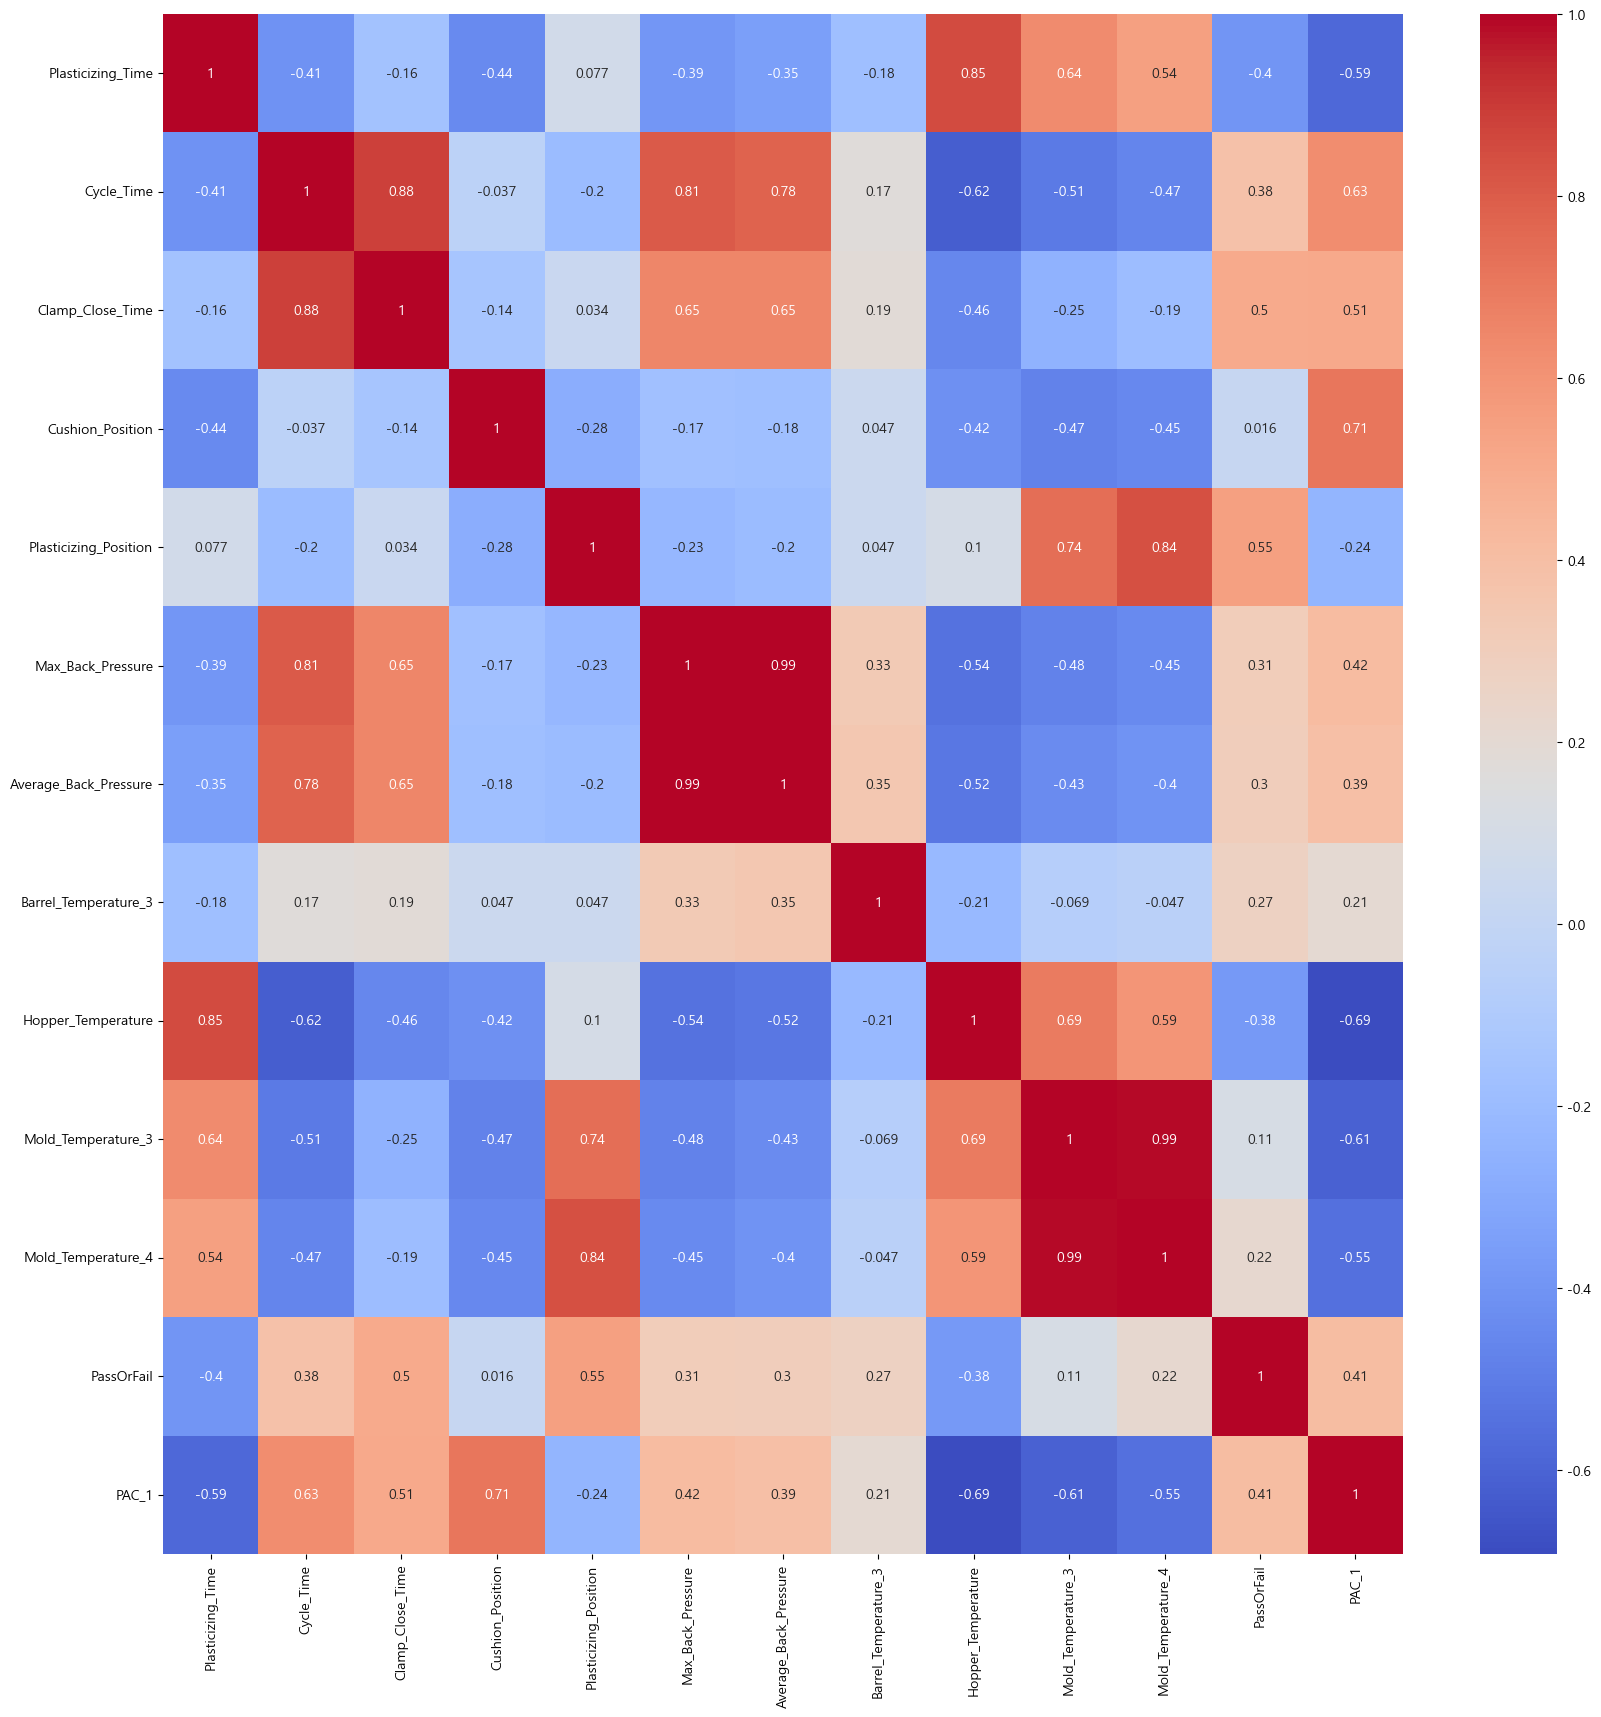

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(cn7.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# VIF 계산을 위한 함수 정의
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["Variable"] = data.columns
    vif["VIF"] = [calculate_single_vif(data, i) for i in range(data.shape[1])]
    return vif

# 각 변수에 대해 VIF 계산
def calculate_single_vif(data, i):
    # 독립변수(다른 변수들)와 회귀 모델을 적합
    x = data.drop(data.columns[i], axis=1)  # 해당 변수 이외의 변수들
    y = data.iloc[:, i]  # 해당 변수
    model = LinearRegression()
    model.fit(x, y)
    # R^2 값 계산
    r2 = model.score(x, y)
    # VIF 계산: 1 / (1 - R^2)
    return 1 / (1 - r2)

# 'PassOrFail'을 제외한 수치형 데이터 선택
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = [col for col in numeric_columns if col != 'PassOrFail']  # 'PassOrFail' 제외

# VIF 데이터 선택
vif_data = cn7[numeric_columns]

# VIF 계산
vif_result = calculate_vif(vif_data)

# VIF 결과 출력
vif_result.sort_values(by="VIF", ascending=False)


,Variable,VIF
10,Mold_Temperature_4,1130.239141
5,Max_Back_Pressure,777.936664
9,Mold_Temperature_3,668.408760
6,Average_Back_Pressure,627.956567
4,Plasticizing_Position,87.679638
11,PAC_1,54.935415
3,Cushion_Position,49.865300
1,Cycle_Time,29.670879
2,Clamp_Close_Time,18.073205
8,Hopper_Temperature,12.916784


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sum_col_list = ['Cycle_Time', 'Clamp_Close_Time', 'Max_Back_Pressure', 'Average_Back_Pressure']

data_pca = cn7[sum_col_list].copy()
data_other = cn7.drop(columns=sum_col_list)

# DataFrame 생성
df_pca = pd.DataFrame(data_pca)
df_other = pd.DataFrame(data_other)

# PCA 대상 변수들만 스케일링
scaler_pca = StandardScaler()
scaled_data_pca = scaler_pca.fit_transform(df_pca)

# PCA 적용 (1개의 주성분으로 축소)
pca = PCA(n_components=1)
principal_component = pca.fit_transform(scaled_data_pca)

# PCA 결과를 원래 데이터셋에 추가
cn7 = pd.concat([df_other, pd.DataFrame(principal_component, columns=["PAC_2"])], axis=1)


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sum_col_list = ['Mold_Temperature_4', 'Mold_Temperature_3', 'Plasticizing_Position']

data_pca = cn7[sum_col_list].copy()
data_other = cn7.drop(columns=sum_col_list)

# DataFrame 생성
df_pca = pd.DataFrame(data_pca)
df_other = pd.DataFrame(data_other)

# PCA 대상 변수들만 스케일링
scaler_pca = StandardScaler()
scaled_data_pca = scaler_pca.fit_transform(df_pca)

# PCA 적용 (1개의 주성분으로 축소)
pca = PCA(n_components=1)
principal_component = pca.fit_transform(scaled_data_pca)

# PCA 결과를 원래 데이터셋에 추가
cn7 = pd.concat([df_other, pd.DataFrame(principal_component, columns=["PAC_3"])], axis=1)


In [18]:
# 'PassOrFail'을 제외한 수치형 데이터 선택
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = [col for col in numeric_columns if col != 'PassOrFail']  # 'PassOrFail' 제외

# VIF 데이터 선택
vif_data = cn7[numeric_columns]

# VIF 계산
vif_result = calculate_vif(vif_data)

# VIF 결과 출력
vif_result.sort_values(by="VIF", ascending=False)


,Variable,VIF
4,PAC_1,13.913935
1,Cushion_Position,13.213766
5,PAC_2,10.732076
3,Hopper_Temperature,6.373011
0,Plasticizing_Time,4.149213
6,PAC_3,1.936773
2,Barrel_Temperature_3,1.152292


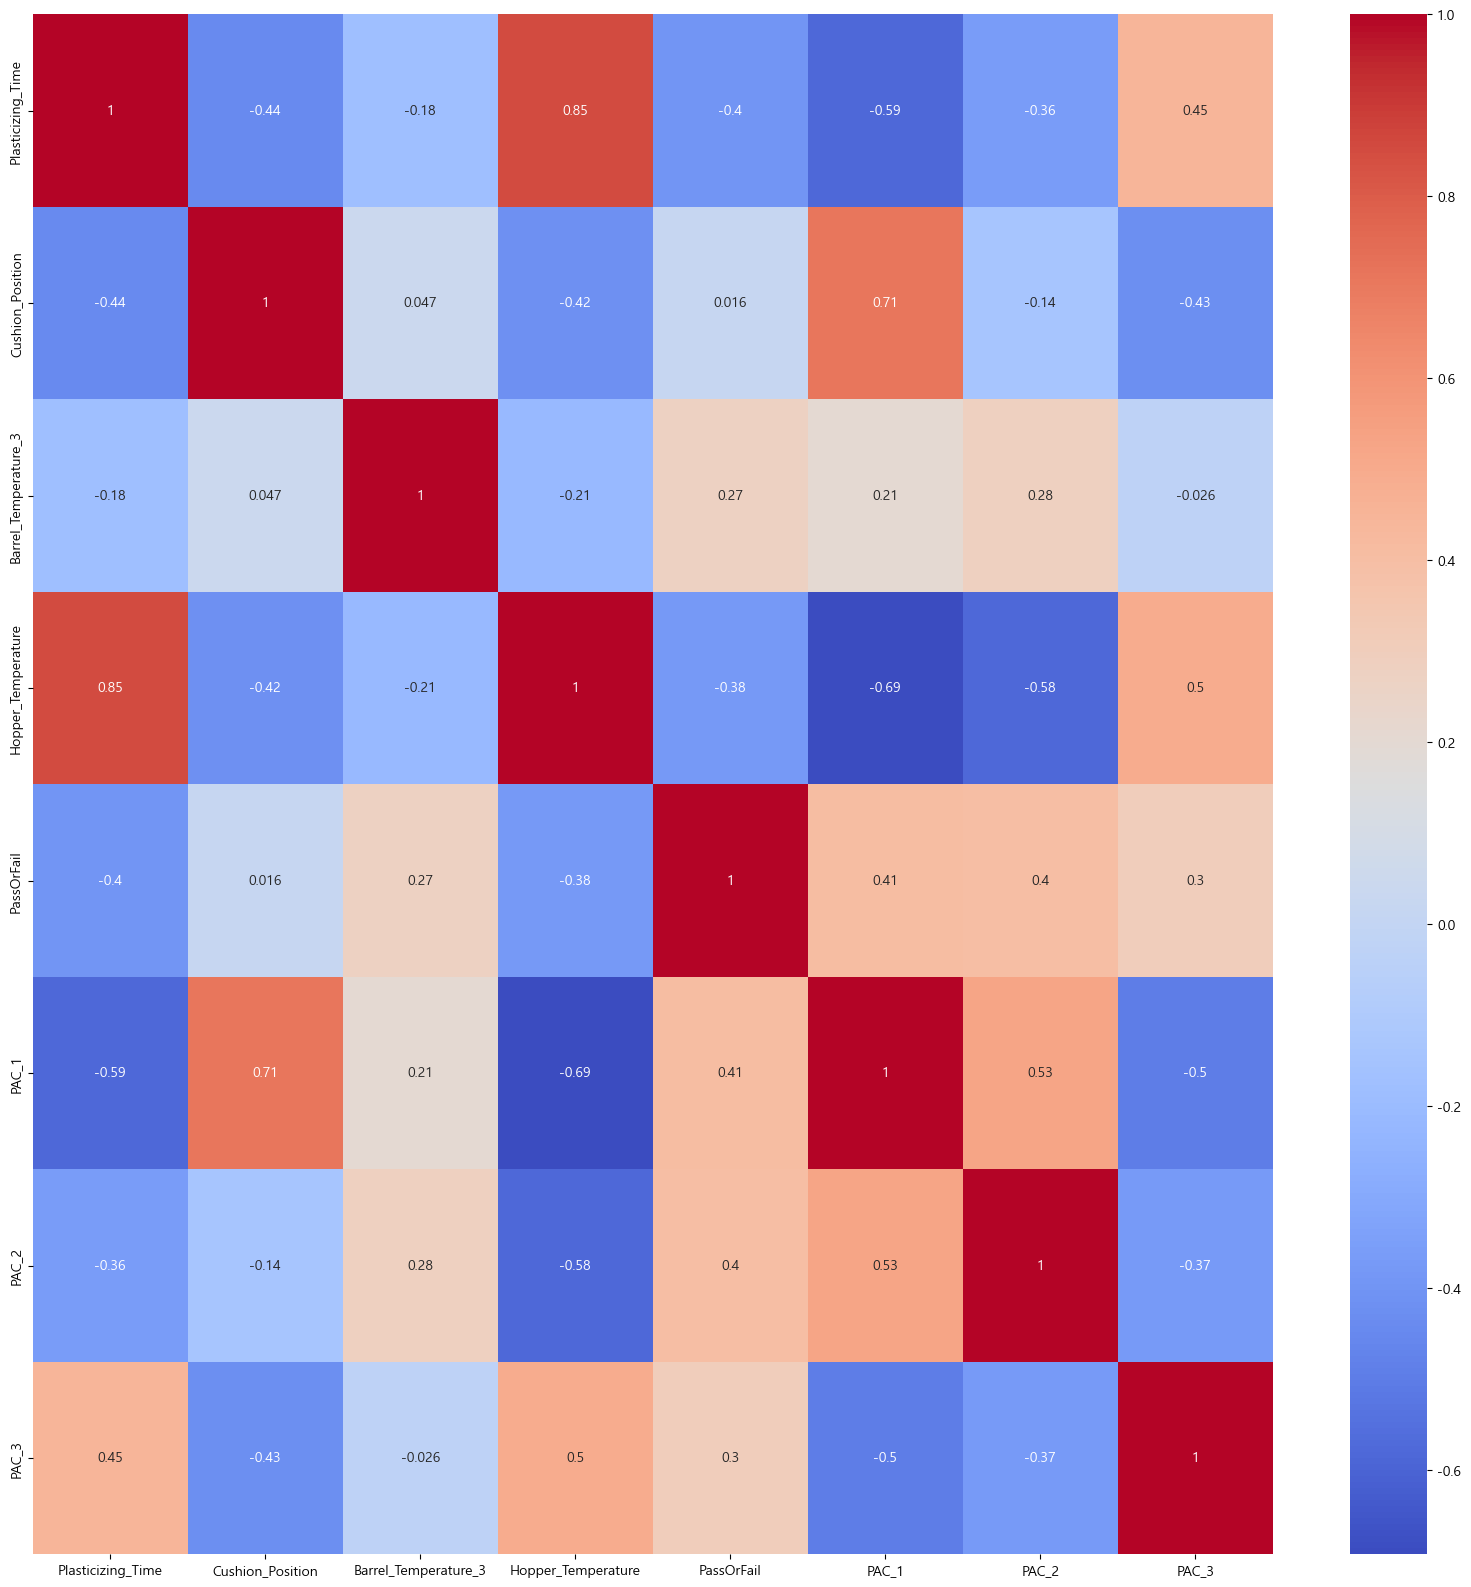

In [19]:
plt.figure(figsize=(20, 20))
sns.heatmap(cn7.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sum_col_list = ['PAC_1', 'Cushion_Position']

data_pca = cn7[sum_col_list].copy()
data_other = cn7.drop(columns=sum_col_list)

# DataFrame 생성
df_pca = pd.DataFrame(data_pca)
df_other = pd.DataFrame(data_other)

# PCA 대상 변수들만 스케일링
scaler_pca = StandardScaler()
scaled_data_pca = scaler_pca.fit_transform(df_pca)

# PCA 적용 (1개의 주성분으로 축소)
pca = PCA(n_components=1)
principal_component = pca.fit_transform(scaled_data_pca)

# PCA 결과를 원래 데이터셋에 추가
cn7 = pd.concat([df_other, pd.DataFrame(principal_component, columns=["PAC_1"])], axis=1)


In [21]:
# 'PassOrFail'을 제외한 수치형 데이터 선택
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = [col for col in numeric_columns if col != 'PassOrFail']  # 'PassOrFail' 제외

# VIF 데이터 선택
vif_data = cn7[numeric_columns]

# VIF 계산
vif_result = calculate_vif(vif_data)

# VIF 결과 출력
vif_result.sort_values(by="VIF", ascending=False)


,Variable,VIF
2,Hopper_Temperature,5.935489
0,Plasticizing_Time,4.014270
3,PAC_2,1.945411
5,PAC_1,1.854256
4,PAC_3,1.548736
1,Barrel_Temperature_3,1.126331


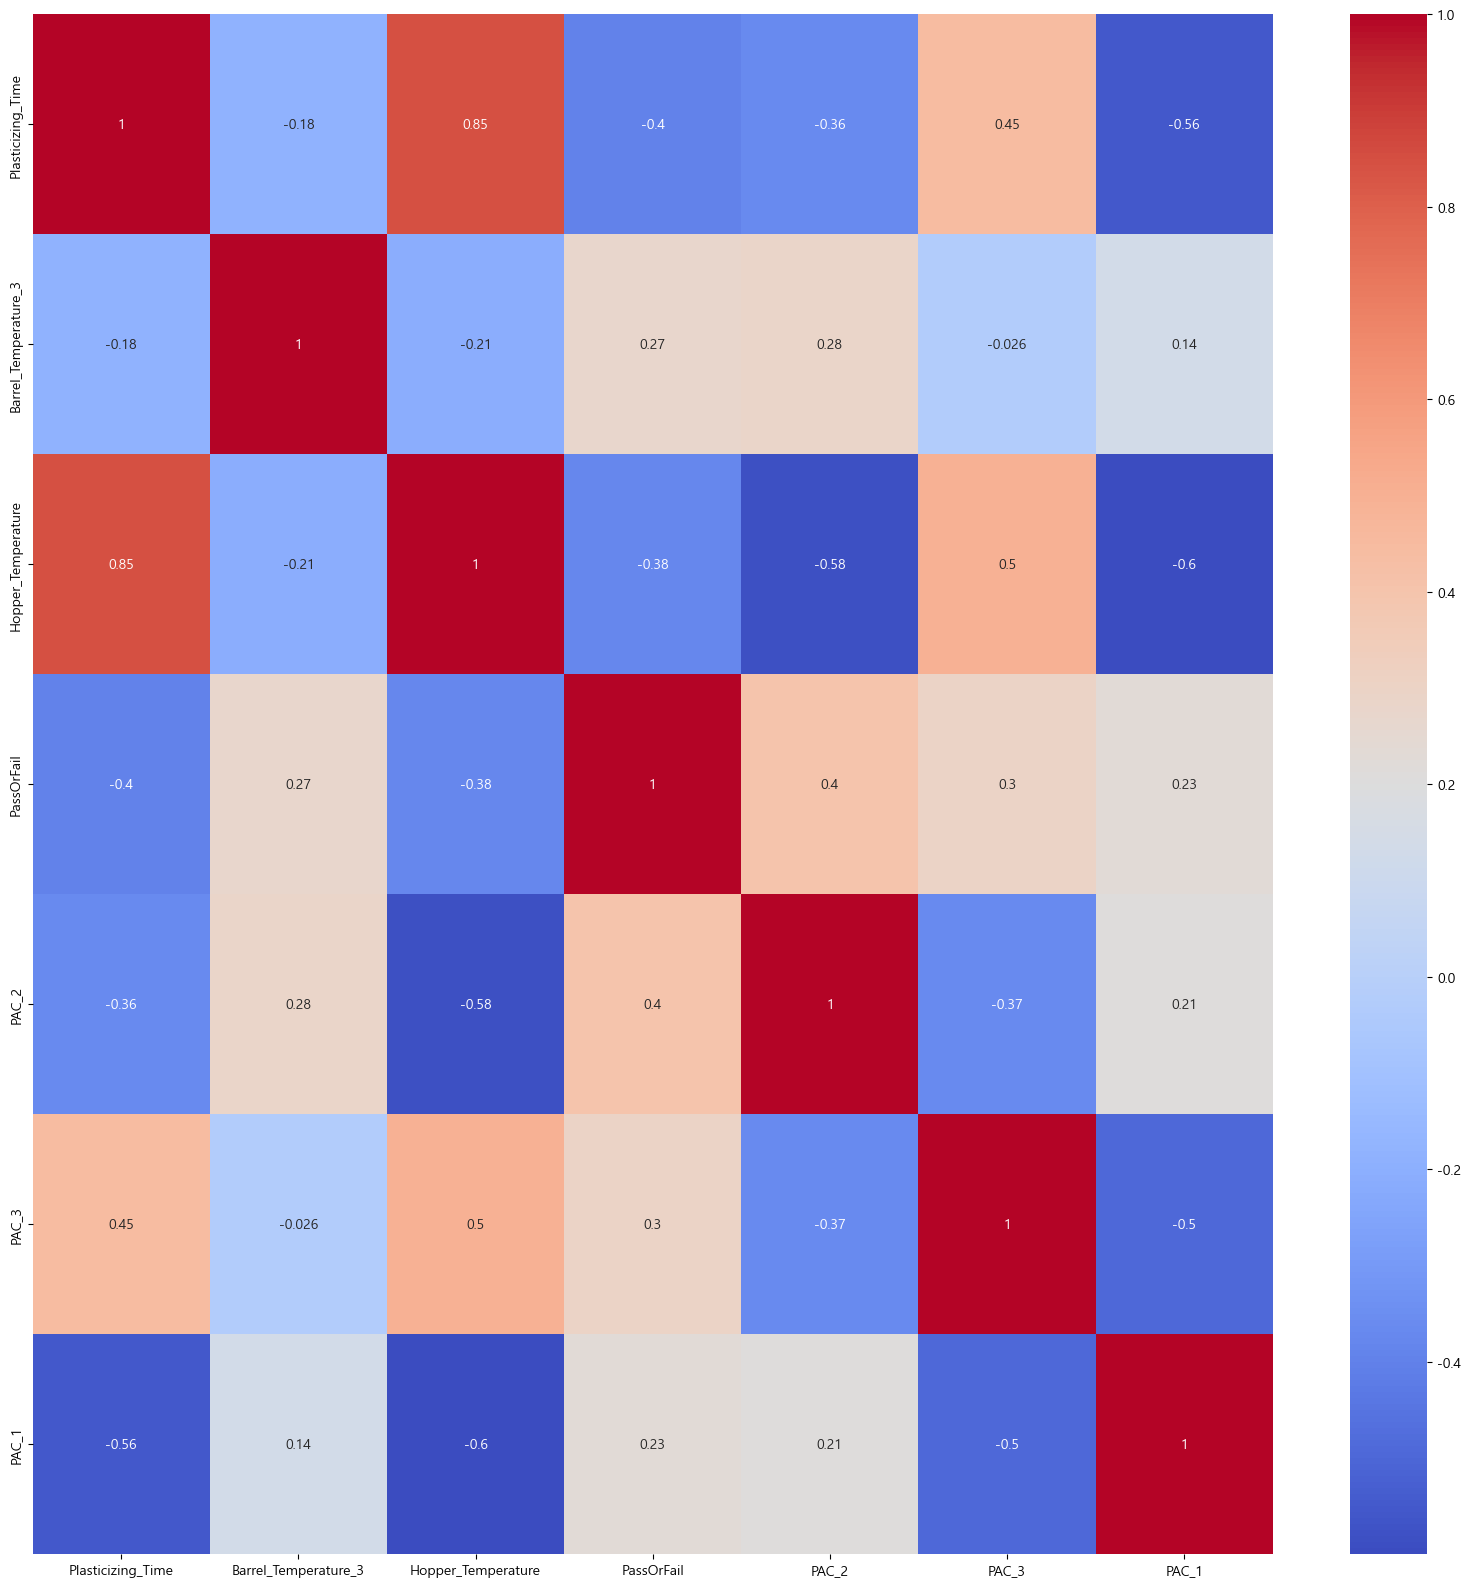

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(cn7.corr(), annot=True, cmap='coolwarm')
plt.show()

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sum_col_list = ['Hopper_Temperature', 'Plasticizing_Time']

data_pca = cn7[sum_col_list].copy()
data_other = cn7.drop(columns=sum_col_list)

# DataFrame 생성
df_pca = pd.DataFrame(data_pca)
df_other = pd.DataFrame(data_other)

# PCA 대상 변수들만 스케일링
scaler_pca = StandardScaler()
scaled_data_pca = scaler_pca.fit_transform(df_pca)

# PCA 적용 (1개의 주성분으로 축소)
pca = PCA(n_components=1)
principal_component = pca.fit_transform(scaled_data_pca)

# PCA 결과를 원래 데이터셋에 추가
cn7 = pd.concat([df_other, pd.DataFrame(principal_component, columns=["PAC_4"])], axis=1)


In [24]:
# 'PassOrFail'을 제외한 수치형 데이터 선택
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = [col for col in numeric_columns if col != 'PassOrFail']  # 'PassOrFail' 제외

# VIF 데이터 선택
vif_data = cn7[numeric_columns]

# VIF 계산
vif_result = calculate_vif(vif_data)

# VIF 결과 출력
vif_result.sort_values(by="VIF", ascending=False)


,Variable,VIF
4,PAC_4,2.068504
3,PAC_1,1.786470
2,PAC_3,1.545210
1,PAC_2,1.496875
0,Barrel_Temperature_3,1.120729


In [25]:
from scipy.stats import spearmanr, pearsonr
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])
for col_name in X.columns:
    print(col_name)
    print("피어슨")
    print(pearsonr(X[col_name], y))
    print("스피어만")
    print(spearmanr(X[col_name], y))
    print("==================================================================")

Barrel_Temperature_3
피어슨
PearsonRResult(statistic=0.2733508014246887, pvalue=4.809640869112652e-58)
스피어만
SignificanceResult(statistic=0.2931954244381584, pvalue=6.80871062508872e-67)
PAC_2
피어슨
PearsonRResult(statistic=0.4034619818398097, pvalue=2.3439510540742418e-130)
스피어만
SignificanceResult(statistic=0.5608485201906678, pvalue=8.845681832309445e-275)
PAC_3
피어슨
PearsonRResult(statistic=0.29955508056267, pvalue=6.959765033902076e-70)
스피어만
SignificanceResult(statistic=0.17252941131888844, pvalue=1.2639759760972924e-23)
PAC_1
피어슨
PearsonRResult(statistic=0.22992883598628394, pvalue=3.9420084908244176e-41)
스피어만
SignificanceResult(statistic=-0.0016203152054463268, pvalue=0.9255994489947522)
PAC_4
피어슨
PearsonRResult(statistic=-0.4019309793426915, pvalue=2.7116802958036826e-129)
스피어만
SignificanceResult(statistic=-0.3446601464725506, pvalue=2.394745485244794e-93)


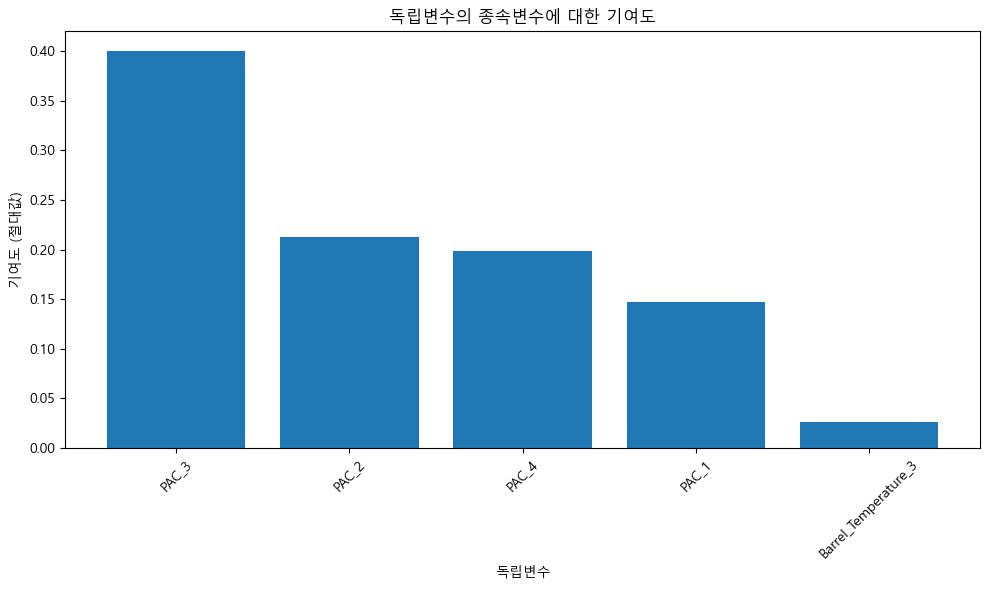

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# 1. 데이터 로드 및 전처리
data = cn7
y = data["PassOrFail"]
X = data.drop(columns=["PassOrFail"])

# 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. 회귀 모델 학습
model = LinearRegression()
model.fit(X_scaled, y)

# 3. 독립변수 기여도 계산 (회귀 계수의 절대값 기준)
coefficients = model.coef_
feature_names = X.columns  # 컬럼명 가져오기

# 기여도 계산 및 정렬
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)[::-1]

# 4. 기여도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), importance[sorted_idx], tick_label=np.array(feature_names)[sorted_idx])
plt.title('독립변수의 종속변수에 대한 기여도')
plt.xlabel('독립변수')
plt.ylabel('기여도 (절대값)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
